# Modificiaciones del método de Euler

__Ejercicio 1:__ Implementar método implicito de Euler como quieran.

$$x_{n+1}=x_n+f(x_{n+1},t_{n+1})h,$$

_Obtenemos $x_{n+1}$ por medio del método de Newton usando una derivada númerica_

In [1]:
#Para ello usamos metodo de newton hecho en la tarea 4, con una ligera modificacion: cambiamos la derivada exacta por una derivada numerica
function metodo_newton(f,x0) #Definimos como al principio
    x = x0
    h = 0.1
    for i in 1:100
        x = x-(f(x))/((f(x+h)-f(x))/(h));     #A partir de aquí, uno se da la idea de que existe un cierto error (Tomar esto como hipotesis)
    end
    return x
end;

In [2]:
#Usaremos el codigo que realizó david ya que es mas directa la sustitución de métodos con esta función.
function euler_implicito(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        t2 = i*h+h
        t_final = h*length(list)
        g(u) = u-x-f(x,t)*h          #La forma en que se da el euler implicito no resulta ser muy intuitiva. Esto se debe por el orden que toman las x (es decir, como se van actualizando en el ciclo for)
        x = metodo_newton(g,x)
        push!(listx,x) 
     end
     return listx
    end;

__Ejercicio 2:__ Implementar Euler: Regla del punto medio.

In [3]:
function euler_pm(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        t2 = i*h+h/2
        x = x + +h*f(x+f(x,t)*h/2,t2)
        push!(listx,x) 
     end
     return listx
    end;

__Ejercicio 3:__ Implementar método de Runge-Kutta de orden 4.

In [4]:
function runge_kutta(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        t2 = i*h+h/2
        #Se actualizan las "kutas":
        k1 = f(x,t)
        k2 = f(x+(h/2)*k1,t2)
        k3 = f(x+(h/2)*k2,t2)
        k4 = f(x+h*k3,t)
        x = x+(h/6)*(k1+2*k2+2*k3+k4) #Por definicion Runge_kutta orden 4
        push!(listx,x) 
     end
     return listx
end;

__Ejercicio 4:__ Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito. __Nota: Este es el test para el método de Euler implícito.__

In [5]:
#Nos traemos los codigos tal y como estaban en la tarea_11 ejercicio1:

In [6]:
function metodo_euler(f,x0,t0,tf,h)
    x = x0
    lista_x = []
    push!(lista_x,x)
    lista_t = linspace(t0,tf,(tf-t0)/h+1)
    for i in 2:length(lista_t)
        t = i*h
        x = x+f(x,t)*h
        push!(lista_x,x)
    end
    return lista_x,lista_t
end;

In [7]:
function f(x,t)
    -(2.5)*x
end;

En $h=1$

In [8]:
metodo_euler(f,1,0,8,1)

(Any[1, -1.5, 2.25, -3.375, 5.0625, -7.59375, 11.3906, -17.0859, 25.6289], 0.0:1.0:8.0)

In [9]:
euler_implicito(f,0:1:8,1)

9-element Array{Any,1}:
   1      
  -1.5    
   2.25   
  -3.375  
   5.0625 
  -7.59375
  11.3906 
 -17.0859 
  25.6289 

En $h=0.5$

In [10]:
metodo_euler(f,1,0,8,0.5)

(Any[1, -0.25, 0.0625, -0.015625, 0.00390625, -0.000976563, 0.000244141, -6.10352e-5, 1.52588e-5, -3.8147e-6, 9.53674e-7, -2.38419e-7, 5.96046e-8, -1.49012e-8, 3.72529e-9, -9.31323e-10, 2.32831e-10], 0.0:0.5:8.0)

In [11]:
euler_implicito(f,0:0.5:8,1)

17-element Array{Any,1}:
  1          
 -0.25       
  0.0625     
 -0.015625   
  0.00390625 
 -0.000976563
  0.000244141
 -6.10352e-5 
  1.52588e-5 
 -3.8147e-6  
  9.53674e-7 
 -2.38419e-7 
  5.96046e-8 
 -1.49012e-8 
  3.72529e-9 
 -9.31323e-10
  2.32831e-10

En $h=0.2$

In [12]:
metodo_euler(f,1,0,8,0.2)

(Any[1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.00195313  …  4.65661e-10, 2.32831e-10, 1.16415e-10, 5.82077e-11, 2.91038e-11, 1.45519e-11, 7.27596e-12, 3.63798e-12, 1.81899e-12, 9.09495e-13], 0.0:0.2:8.0)

In [13]:
euler_implicito(f,0:0.2:8,1)

41-element Array{Any,1}:
 1          
 0.5        
 0.25       
 0.125      
 0.0625     
 0.03125    
 0.015625   
 0.0078125  
 0.00390625 
 0.00195313 
 0.000976563
 0.000488281
 0.000244141
 ⋮          
 1.86265e-9 
 9.31323e-10
 4.65661e-10
 2.32831e-10
 1.16415e-10
 5.82077e-11
 2.91038e-11
 1.45519e-11
 7.27596e-12
 3.63798e-12
 1.81899e-12
 9.09495e-13

En $h=0.01$

In [14]:
metodo_euler(f,1,0,8,0.01)

(Any[1, 0.975, 0.950625, 0.926859, 0.903688, 0.881096, 0.859068, 0.837592, 0.816652, 0.796236  …  2.00748e-9, 1.95729e-9, 1.90836e-9, 1.86065e-9, 1.81413e-9, 1.76878e-9, 1.72456e-9, 1.68145e-9, 1.63941e-9, 1.59843e-9], 0.0:0.01:8.0)

In [15]:
euler_implicito(f,0:0.01:8,1)

801-element Array{Any,1}:
 1         
 0.975     
 0.950625  
 0.926859  
 0.903688  
 0.881096  
 0.859068  
 0.837592  
 0.816652  
 0.796236  
 0.77633   
 0.756921  
 0.737998  
 ⋮         
 2.11175e-9
 2.05895e-9
 2.00748e-9
 1.95729e-9
 1.90836e-9
 1.86065e-9
 1.81413e-9
 1.76878e-9
 1.72456e-9
 1.68145e-9
 1.63941e-9
 1.59843e-9

In [16]:
function q(t)
    exp.(-5t/2)
end;

In [17]:
using PyPlot

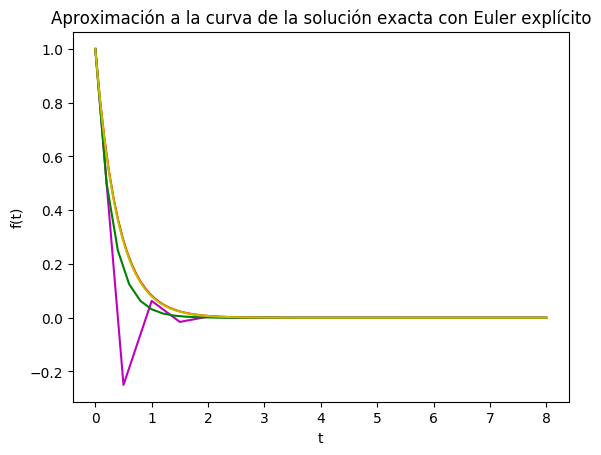

In [18]:
t = linspace(0,8,100)
xlabel("t")
ylabel("f(t)")
title("Aproximación a la curva de la solución exacta con Euler explícito")
plot(t,q(t),color="r");
plot(metodo_euler(f,1,0,8,0.5)[2],metodo_euler(f,1,0,8,0.5)[1],color="m");
plot(metodo_euler(f,1,0,8,0.2)[2],metodo_euler(f,1,0,8,0.2)[1],color="g");
plot(metodo_euler(f,1,0,8,0.01)[2],metodo_euler(f,1,0,8,0.01)[1],color="y");

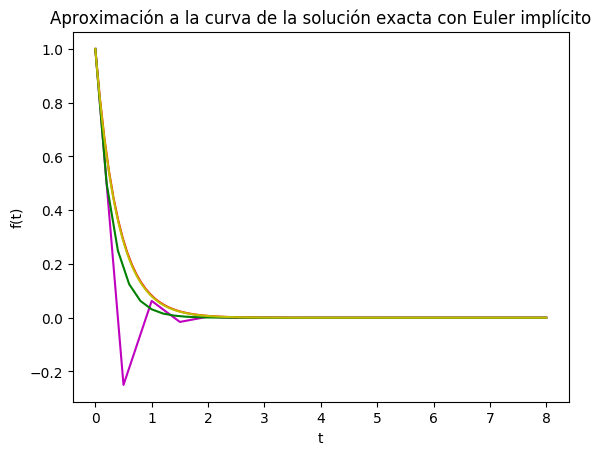

In [19]:
t = linspace(0,8,100)
xlabel("t")
ylabel("f(t)")
title("Aproximación a la curva de la solución exacta con Euler implícito")
plot(t,q(t),color="r");
plot(0:0.5:8,euler_implicito(f,0:0.5:8,1),color="m");
plot(0:0.2:8,euler_implicito(f,0:0.2:8,1),color="g");
plot(0:0.01:8,euler_implicito(f,0:0.01:8,1),color="y");

_Dados los valores y las graficas mostradas, podemos observar que el método de Euler implicito da valores iguales al método de Euler (explícito). Esto es impresionante, pues se supone que en la derivada numerica del método de Newton se requiere un $h$ que tienda a 0 además de un $i$ que tienda al infinito, cosas que no se cumplen como tales para los valores que otorgamos._

__Ejercicio 5__: Usar el método del punto medio y de Runge-Kutta para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$. __Nota: Este es el test para el de Runge-Kutta.__

_Conviene ver la comparación por medio de gráficas:_

In [20]:
#Ecuación diferencial
function q(x,t)
    (2*x-18*t)/(1+t)
end;

In [21]:
#Solución exacta
function p(t)
    4+8t-5t^2
end;

In [22]:
function valores_solucion_exacta(q,t)
    lista_t = collect(t)
    lista_q = []
    r = 0.0
    for i in 1:length(lista_t)
        r = q(lista_t[i])       #No confundir con solo poner i.
        push!(lista_q,r)
    end
    return lista_q              #Que nos regrese las coordenadas en el eje y.
end;

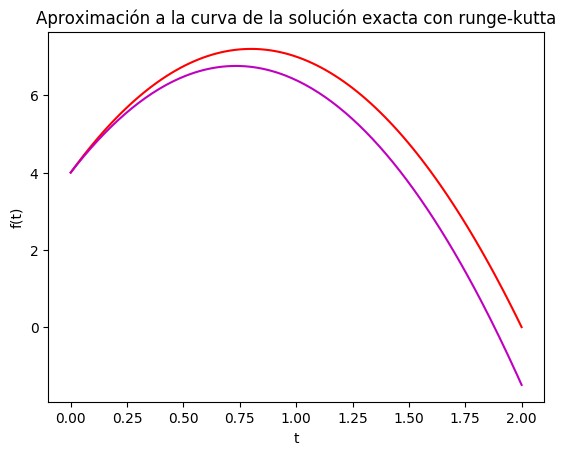

In [23]:
#Ahora sí, graficamos:
t = linspace(0,2,100)
xlabel("t")
ylabel("f(t)")
title("Aproximación a la curva de la solución exacta con runge-kutta")
plot(t,valores_solucion_exacta(p,t),color="r");
plot(0:0.01:2,runge_kutta(q,0:0.01:2,4),color="m");

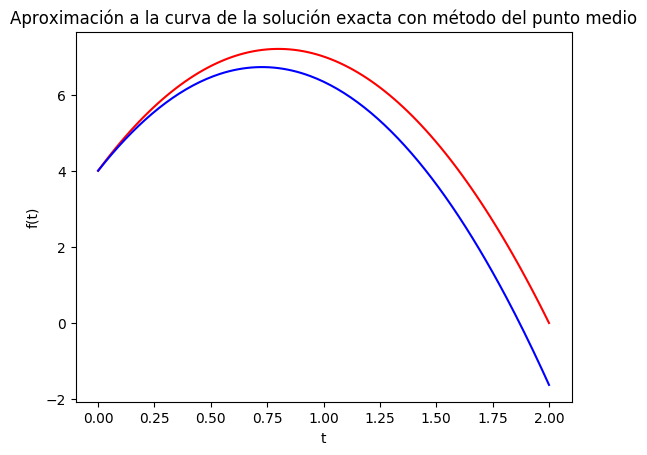

In [24]:
t = linspace(0,2,100)
xlabel("t")
ylabel("f(t)")
title("Aproximación a la curva de la solución exacta con método del punto medio")
plot(t,valores_solucion_exacta(p,t),color="r");
plot(0:0.01:2,euler_pm(q,0:0.01:2,4),color="b");

_Aparentemente, ambos métodos son igual de efectivos para aproximarse a la curva de solución exacta dada la resolución de la grafica como con $p(x,t)$ y $q(t)$ dados_

__Ejercicio 6__: Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

__Nota:__ Deberán hacer una implementación de Runge-Kutta para dos dimensiones (o de una vez más si quieren, basandose en el ejemplo que les di, si se les ocurre una mánera mejor, adelante).

__Nota:__ Usen $h=0.1$ para hacer la comparación o cualquier otro que refleje una diferencia significativa entre los dos métodos en la energía, el chiste es no usar un $h$ muy pequeño.

_Para resolverlo, podemos usar el método Runge-Kutta desarrollado anteriormente, sólo es necesario ejecutar a cada dimension por separado, pues ya sabemos que lo que nos devuelve son listas que podemos graficar sencillamente._

__A partir de la tarea 11:__

In [25]:
function euler(f,list,x0)
     x = x0
     h = list[2]-list[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(list)
        t = i*h
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
    end;

In [26]:
#La función que queremos resolver.
f(x,t)=[x[2], -1.0*x[1]]

#Intervalo donde será graficado, de esta manera en ves del linspace por comodidad
list=0:0.1:10;

#Soluciones iniciales x(0)=0 y u(0)=2.
soluciones_condiciones_iniciales=euler(f,list,[0,2]);
soluciones_runge=runge_kutta(f,list,[0,2]);

#Por comodidad, lo guardamos todo en listas:
listx1=map(x->x[1],soluciones_condiciones_iniciales);
listx2=map(x->x[2],soluciones_condiciones_iniciales);

listxA=map(x->x[1],soluciones_runge);
listxB=map(x->x[2],soluciones_runge);


In [27]:
#Debido a las listas, nos resulta mas práctico definir los diferentes tipos de energía, y evaluar con un elemento de las listas dadas para conocer el valor de cada energía:

#Vamos a tener una energía constante con las condiciones iniciales x(0)=0 y u(0)=2
function energia_constante(x,y)
    return 2
end;

#Queremos ver la relación entre energía cinética y potencial, las cuales están dadas por:
function e_c(x,y)
    return  0.5*x*x
end;

function e_p(x,y)
    return  0.5*y*y
end;

#Por lo tanto, la energía total es:
function energia(x,y)
    return  0.5*x*x+0.5y*y
end;

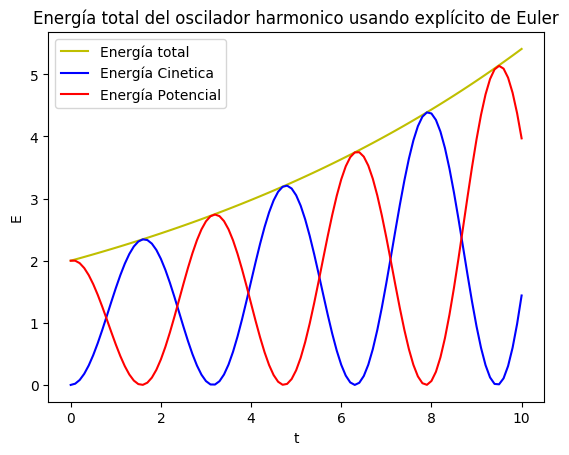

In [28]:
#Hacemos la gráfica
xlabel("t")
ylabel("E")
title("Energía total del oscilador harmonico usando explícito de Euler")
plot(list,energia.(listx1, listx2), label="Energía total",color="y");
plot(list,e_c.(listx1,listx2), label="Energía Cinetica",color="b");
plot(list,e_p.(listx1,listx2), label="Energía Potencial",color="r");
legend();

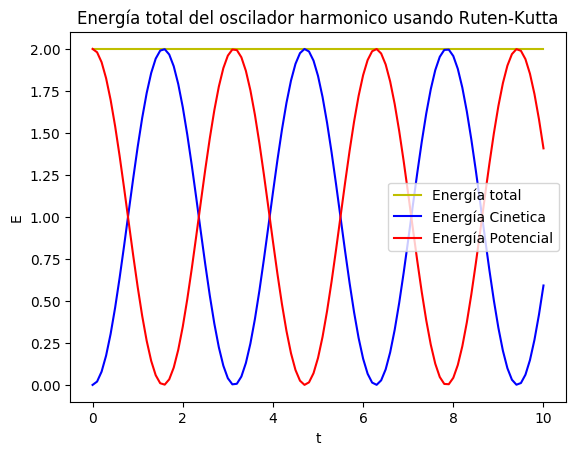

In [29]:
xlabel("t")
ylabel("E")
title("Energía total del oscilador harmonico usando Ruten-Kutta")
plot(list,energia_constante.(listxA, listxA), label="Energía total",color="y");
plot(list,e_c.(listxA,listxB), label="Energía Cinetica",color="b");
plot(list,e_p.(listxA,listxB), label="Energía Potencial",color="r");
legend();

_Como la gráfica de la energía total debe ser en función de una constante, el método Runge-Kutta resulta ser el ideal. Otra consecuencia se puede ver en el ejercicio siguiente: el espacio fase de la solución teórica resulta ser identico al de Kutta._

__Ejercicio 7:__ Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. 
__Nota:__ Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos `listx` y `listv`, bastará con hacer `plot(listx,listv)`.

In [30]:
#De manera muy similar al ejercicio 6:
lista=0:0.01:100;#Con h=0.01

soluciones_condiciones_iniciales_euler=euler(f,lista,[0,2]);
soluciones_condiciones_iniciales_kutta=runge_kutta(f,lista,[0,2]);

#En este caso, veremos tambien la solución teorica:
listx1_euler=map(x->x[1],soluciones_condiciones_iniciales_euler); #Estas listas ya te dan v
listx2_euler=map(x->x[2],soluciones_condiciones_iniciales_euler);
listx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
listx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);

listx_solucion_teorica=2*sin.(lista); 
listx_derivada_solucion_teorica=2*cos.(lista); #Obvio, la derivada c.r. al tiempo es v

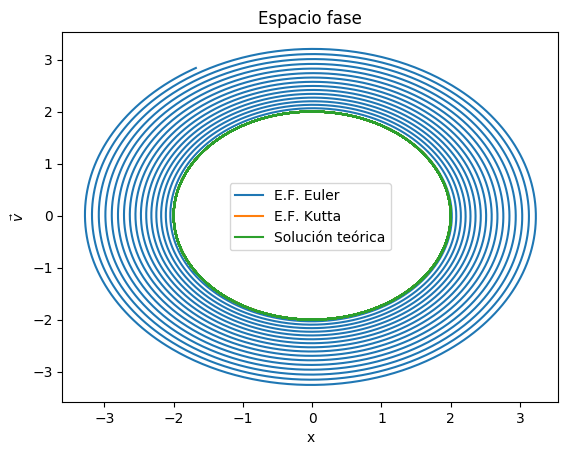

In [31]:
xlabel("x")
ylabel(L"\vec{v}")   
title("Espacio fase")
plot(listx1_euler,listx2_euler, label="E.F. Euler");
plot(listx1_kutta,listx2_kutta, label="E.F. Kutta");
plot(listx_solucion_teorica,listx_derivada_solucion_teorica, label="Solución teórica");
legend();

#Note que el E.F. kutta se encuentra en las mismas coordenadas que el E.F. sol. teorica.

__Ejercicio 8:__ Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

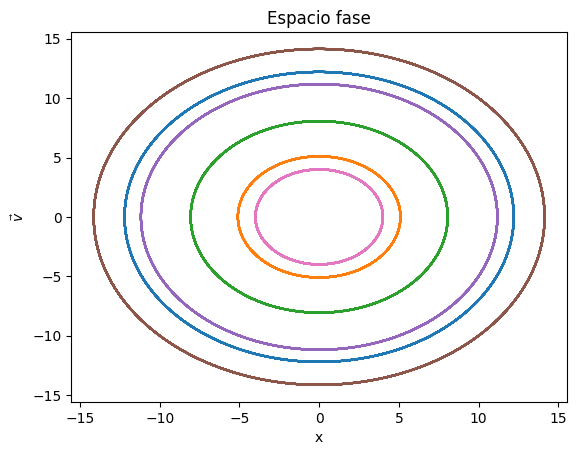

In [34]:
#Dos listas con puros randomize en los cuales se introducirán en un ciclo for para ir graficando uno a uno.
randoms1=[rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0)]
randoms2=[rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0),rand(0.0:10.0)]

for i in 1:length(randoms1)
    soluciones_condiciones_iniciales_kutta=runge_kutta(f,lista,[randoms1[i],randoms2[i]]);
    listx1_kutta=map(x->x[1],soluciones_condiciones_iniciales_kutta);
    listx2_kutta=map(x->x[2],soluciones_condiciones_iniciales_kutta);
    
    xlabel("x")
    ylabel(L"\vec{v}")   
    title("Espacio fase")
    plot(listx1_kutta,listx2_kutta);
end;